# Numpy and Scipy

[Numpy](http://numpy.org) is the **fundamental package for scientific computing with Python**. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (**broadcasting**) functions [what is *broadcasting*?]
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

[Scipy](http://scipy) contains additional routines for optimization, special functions, and so on. Both contain modules written in C and Fortran so that they're as fast as possible. Together, they give Python roughly the same capability that the [Matlab](http://www.mathworks.com/products/matlab/) program offers. (In fact, if you're an experienced Matlab user, there a [guide to Numpy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users) just for you.)

In IPython, the easiest way to import the numpy package is to call **%pylab inline**. A frequent alternative is to call **import numpy as np**.

## Making vectors and matrices
Fundamental to both Numpy and Scipy is the ability to work with vectors and matrices. You can create vectors from lists using the **array** command:

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
random.seed(1)

In [6]:
array([-2,0,1,2,3,4,5,6])

array([-2,  0,  1,  2,  3,  4,  5,  6])

**remember:** a [python list](https://docs.python.org/2/tutorial/datastructures.html) and a [numpy array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) are different! E.g.

In [7]:
[1,2,3]+[4,5,8]

[1, 2, 3, 4, 5, 8]

In [8]:
array([1,2,3])+array([4,5,8])

array([ 5,  7, 11])

What is the type of the array?

In [9]:
array([-2,0,1,2,3,4,5,6]).dtype

dtype('int64')

You can pass in a second argument to **array** that gives the numeric type. There are a number of types [listed here](http://docs.scipy.org/doc/numpy/user/basics.types.html) that your array can be. The most common ones are float64 (double precision floating point number), and int64.

In [10]:
array([-2,0,1,2,3,4,5,6],float64)

array([-2.,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

Other examples

In [11]:
array([-2,0,1,2,3,4,5,6],bool)

array([ True, False,  True,  True,  True,  True,  True,  True], dtype=bool)

An array with different types:

In [12]:
array([1.,2,'a',True])

array(['1.0', '2', 'a', 'True'], 
      dtype='|S32')

numpy try to infer the most exhaustive type, this could be useful or not. As an alternative, you could force the type to be an **object** so that everything keep its original type.

In [13]:
array([1.,2,'a',True],object)

array([1.0, 2, 'a', True], dtype=object)

To build matrices, you can either use the array command with lists of lists:

In [14]:
array([[0,1], [1,0]], float64)

array([[ 0.,  1.],
       [ 1.,  0.]])

You can create arrays with any number of dimensions using lists of lists of .... of lists:

In [16]:
array([[[0,1],[0,1]], [[1,0],[1,0]]],float64)


array([[[ 0.,  1.],
        [ 0.,  1.]],

       [[ 1.,  0.],
        [ 1.,  0.]]])

### Array creation routines

You can also form empty (zero) matrices of arbitrary shape (including vectors, which Numpy treats as vectors with one row), using the **[zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)** command:

In [18]:
zeros((3,3), float64)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

The first argument is a tuple containing the **shape** of the matrix, and the second is the data type (**dtype**) argument, which follows the same conventions as in the array command. The default dtype is float32. Thus, you can make row vectors:

In [19]:
zeros(3)

array([ 0.,  0.,  0.])

In [20]:
zeros((1, 3))

array([[ 0.,  0.,  0.]])

or column vectors:

In [21]:
zeros((3, 1))

array([[ 0.],
       [ 0.],
       [ 0.]])

The **[identity](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html)** function creates an identity matrix:

In [22]:
identity(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

And the **[ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html)** funciton creates an array of ones:

In [25]:
ones((3, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [20]:
help(identity)

Help on function identity in module numpy.core.numeric:

identity(n, dtype=None)
    Return the identity array.
    
    The identity array is a square array with ones on
    the main diagonal.
    
    Parameters
    ----------
    n : int
        Number of rows (and columns) in `n` x `n` output.
    dtype : data-type, optional
        Data-type of the output.  Defaults to ``float``.
    
    Returns
    -------
    out : ndarray
        `n` x `n` array with its main diagonal set to one,
        and all other elements 0.
    
    Examples
    --------
    >>> np.identity(3)
    array([[ 1.,  0.,  0.],
           [ 0.,  1.,  0.],
           [ 0.,  0.,  1.]])



You can create arrays with any number of dimensions by adding dimensions to the **shape** argument:

In [27]:
ones((6, 3, 5))

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]]])

In [28]:
?identity

Other array creation routines are:

**[empty](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html)**

In [35]:
empty((2, 2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [30]:
help(empty)

Help on built-in function empty in module numpy.core.multiarray:

empty(...)
    empty(shape, dtype=float, order='C')
    
    Return a new array of given shape and type, without initializing entries.
    
    Parameters
    ----------
    shape : int or tuple of int
        Shape of the empty array
    dtype : data-type, optional
        Desired output data-type.
    order : {'C', 'F'}, optional
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of uninitialized (arbitrary) data of the given shape, dtype, and
        order.  Object arrays will be initialized to None.
    
    See Also
    --------
    empty_like, zeros, ones
    
    Notes
    -----
    `empty`, unlike `zeros`, does not set the array values to zero,
    and may therefore be marginally faster.  On the other hand, it requires
    the user to manually set all the values in the 

In [ ]:
# identity - shift + tab

**[eye](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html)**

In [37]:
eye(3, 4, 1)

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [ ]:
# 3 righe, 4 colonne e la prima diagonale di 1

**[arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)**

In [40]:
arange(4)

array([0, 1, 2, 3])

In [41]:
help(arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

In [42]:
arange(2,6)

array([2, 3, 4, 5])

In [43]:
arange(-10,4)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3])

In [45]:
arange(4,-10,-2)
# partenza 4, fine -10, passo 2...la fine non viene mai data

array([ 4,  2,  0, -2, -4, -6, -8])

**[diag](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html)**

In [46]:
diag(arange(4))
#diag(diag(arange(4))) #mi restituisce la diagonale

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [47]:
diag(diag(arange(4))) #mi restituisce la diagonale

array([0, 1, 2, 3])

The **[linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)** command makes a linear array of points from a starting to an ending value.

In [48]:
linspace(0, 2, 5)
# da 0 a 2, ed ha 5 elementi

array([ 0. ,  0.5,  1. ,  1.5,  2. ])

Same command in log, [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)

In [55]:
logspace(0, 2, 9)
# da 10^0 a 10^2......fino ad arrivare a 9 elementi

array([   1.        ,    1.77827941,    3.16227766,    5.62341325,
         10.        ,   17.7827941 ,   31.6227766 ,   56.23413252,  100.        ])

### [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

In [56]:
a = arange(64)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [57]:
a.reshape(8,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

### [transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html)

In [58]:
a.reshape(8,8).T

array([[ 0,  8, 16, 24, 32, 40, 48, 56],
       [ 1,  9, 17, 25, 33, 41, 49, 57],
       [ 2, 10, 18, 26, 34, 42, 50, 58],
       [ 3, 11, 19, 27, 35, 43, 51, 59],
       [ 4, 12, 20, 28, 36, 44, 52, 60],
       [ 5, 13, 21, 29, 37, 45, 53, 61],
       [ 6, 14, 22, 30, 38, 46, 54, 62],
       [ 7, 15, 23, 31, 39, 47, 55, 63]])

### [Indexing/Slicing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

You can index and slice numpy arrays in the same way you index/slice lists.

In [60]:
a3 = arange(30) 
a3

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [62]:
a3[-1]

29

In [63]:
a3[0]

0

In [65]:
a3[::-1]
# mi dà l'array di prima con ordinamento inverso, con passo -1

array([29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [67]:
a3[::-2] #con passo -2

array([29, 27, 25, 23, 21, 19, 17, 15, 13, 11,  9,  7,  5,  3,  1])

In [68]:
a3[2:5]

array([2, 3, 4])

### [Boolean array indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html): a very **useful** recipe

In [69]:
a3[a3>20]

array([21, 22, 23, 24, 25, 26, 27, 28, 29])

In [70]:
x = array([[1., 2.], [nan, 3.], [nan, nan]])

In [71]:
x

array([[  1.,   2.],
       [ nan,   3.],
       [ nan,  nan]])

In [72]:
isnan(x)
# mi dà gli elementi NaN

array([[False, False],
       [ True, False],
       [ True,  True]], dtype=bool)

In [74]:
# help(isnan)

#### 2d, 3d slicing

In [75]:
a = arange(64).reshape(8,8)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [76]:
a[0,:]
#prima riga

array([0, 1, 2, 3, 4, 5, 6, 7])

In [77]:
a[:,0]
#prima colonna

array([ 0,  8, 16, 24, 32, 40, 48, 56])

In [78]:
a[:2,:2]

array([[0, 1],
       [8, 9]])

In [79]:
a[::2,::2]
# tutte le righe, tutte le colonne, passo 2 (una si,una no)

array([[ 0,  2,  4,  6],
       [16, 18, 20, 22],
       [32, 34, 36, 38],
       [48, 50, 52, 54]])

In [80]:
b = arange(27).reshape(3,3,3)
b

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [81]:
b[0,0,0]
#elemento in posizione (0,0,0)

0

In [82]:
b[0,:,:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [83]:
b[:,0,:]

array([[ 0,  1,  2],
       [ 9, 10, 11],
       [18, 19, 20]])

In [84]:
b[:,:,0]

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

### NumPy Functions

http://docs.scipy.org/doc/numpy/reference/routines.math.html

#### [randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)

In [9]:
a=random.randint(0,10,100)
#100 numeri random tra 0 e 10

In [11]:
a

array([5, 2, 5, 6, 6, 8, 7, 7, 7, 2, 6, 0, 5, 2, 1, 8, 5, 9, 4, 9, 1, 2, 0,
       4, 7, 0, 6, 2, 4, 3, 6, 7, 6, 3, 0, 6, 4, 7, 6, 2, 9, 5, 9, 9, 9, 8,
       6, 4, 2, 9, 4, 0, 0, 3, 4, 9, 3, 9, 1, 2, 5, 4, 0, 8, 2, 3, 9, 9, 4,
       4, 8, 2, 1, 6, 3, 8, 9, 7, 0, 5, 2, 2, 8, 5, 0, 5, 9, 8, 6, 6, 0, 4,
       7, 3, 0, 1, 6, 0, 6, 1])

In [8]:
# a=random.randint(0,2,100)
# a
# 100 numeri random tra 0 e 2 (2 è escluso)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1])

#### [min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html)

In [88]:
a.min()

0

#### [max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html)

In [89]:
a.max()

9

#### [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.mean.html)

In [90]:
a.mean()

4.2400000000000002

#### [std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.std.html)

In [91]:
a.std()#standard deviation

3.0070583632513688

#### [sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.sum.html)

In [92]:
a.sum()

424

In [93]:
b=random.randint(0,10,(10,5))
# serve per creare una matrice

In [94]:
b

array([[4, 3, 3, 6, 7],
       [3, 5, 3, 2, 4],
       [4, 0, 3, 3, 8],
       [3, 5, 6, 7, 5],
       [1, 7, 0, 2, 8],
       [2, 1, 4, 0, 4],
       [1, 7, 3, 1, 6],
       [6, 9, 6, 9, 6],
       [0, 0, 2, 9, 6],
       [0, 6, 7, 0, 3]])

In [95]:
b.shape

(10, 5)

In [96]:
b.T

array([[4, 3, 4, 3, 1, 2, 1, 6, 0, 0],
       [3, 5, 0, 5, 7, 1, 7, 9, 0, 6],
       [3, 3, 3, 6, 0, 4, 3, 6, 2, 7],
       [6, 2, 3, 7, 2, 0, 1, 9, 9, 0],
       [7, 4, 8, 5, 8, 4, 6, 6, 6, 3]])

In [97]:
b.T.shape

(5, 10)

#### [trace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.trace.html)

In [98]:
b.trace()
#somma elementi sulla diagonale = traccia

27

#### [diag](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.diag.html)

In [99]:
diag(b)

array([4, 5, 3, 7, 8])

In [100]:
b.min()
# min di tutta la matrice

0

In [101]:
b.min(axis=0)
# min di tutte le colonne

array([0, 0, 0, 0, 3])

In [102]:
b.min(axis=1)
# min di tutte le righe (asse 1)

array([3, 2, 0, 3, 0, 0, 1, 6, 0, 0])

#### [ravel](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.ravel.html)

In [103]:
b.ravel()
#trasforma da una matrice ad un array

array([4, 3, 3, 6, 7, 3, 5, 3, 2, 4, 4, 0, 3, 3, 8, 3, 5, 6, 7, 5, 1, 7, 0,
       2, 8, 2, 1, 4, 0, 4, 1, 7, 3, 1, 6, 6, 9, 6, 9, 6, 0, 0, 2, 9, 6, 0,
       6, 7, 0, 3])

# Matplotlib

[Matplotlib](http://matplotlib.org/) is the **fundamental package for scientific plotting with Python**. We suggest to visit the [gallery](http://matplotlib.org/gallery.html) to get an idea of the different kind of plots that it could be made with matplotlib

In [15]:
x=array([1,2,4,10])
y=array([-2,6,7,2])

#### [plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

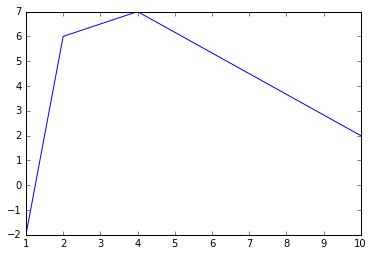

In [16]:
plot(x,y)
#plot(x,y, 'o')   #non mi dà la linea ma i punti
#plot(x,y, 'x')   #non mi dà la linea ma delle x
#plot(x,y, ':x')   #linee tratteggiate

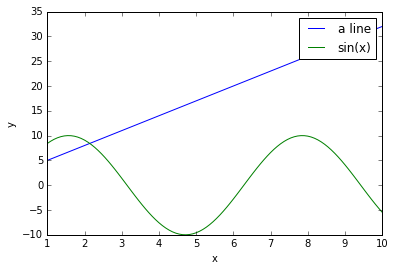

In [18]:
plot(x,2+3*x,label='a line')
plot(linspace(1,10,100),10*sin(linspace(1,10,100)),label='sin(x)')

# plot(linspace(1,10,100),sin(linspace(1,10,100)),label='sin(x)')
# se do sin(x) non funziona perchè lui non sa cosa è x, quindi devo prima definire x in un array
xlabel('x')
ylabel('y')
legend()

In [21]:
r=random.rand(100)
r
# help(random.rand) = distribuzione uniforme

array([ 0.00934858,  0.57675593,  0.31144421,  0.5172676 ,  0.91640585,
        0.42647479,  0.24739604,  0.37129376,  0.93186112,  0.93686838,
        0.84432995,  0.92020651,  0.22790029,  0.08748221,  0.22730974,
        0.31437662,  0.17476588,  0.60709416,  0.41358642,  0.81635151,
        0.1851304 ,  0.70187653,  0.24035562,  0.57421909,  0.3489876 ,
        0.0569644 ,  0.22881367,  0.66410256,  0.49725009,  0.51901598,
        0.17472015,  0.57071585,  0.99675343,  0.81683511,  0.59437262,
        0.97598907,  0.90156258,  0.59560793,  0.03242633,  0.0935771 ,
        0.06537172,  0.45173315,  0.37543483,  0.97535003,  0.16798329,
        0.97278759,  0.76747487,  0.82423784,  0.63261582,  0.66873277,
        0.47688233,  0.01313636,  0.35300609,  0.4920718 ,  0.73009121,
        0.46862834,  0.45740492,  0.13766274,  0.01088873,  0.75827826,
        0.31995284,  0.98438345,  0.22023423,  0.33870803,  0.52389614,
        0.75489146,  0.46385778,  0.12482254,  0.31250138,  0.50

(array([ 11.,   8.,   8.,  10.,  12.,  12.,  11.,   8.,   9.,  11.]),
 array([ 0.00523984,  0.1043912 ,  0.20354256,  0.30269391,  0.40184527,
         0.50099663,  0.60014799,  0.69929935,  0.79845071,  0.89760207,
         0.99675343]),
 <a list of 10 Patch objects>)

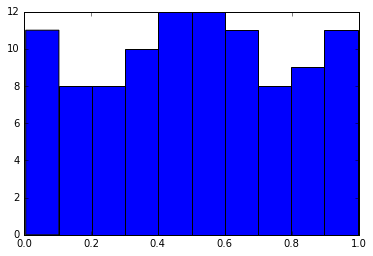

In [22]:
hist(r)
# hist(r, 20) #con 20 barrette e non 10 di default
#show()

#### [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)

(array([ 37.,  24.,  39.]),
 array([ 0. ,  0.4,  0.6,  1. ]),
 <a list of 3 Patch objects>)

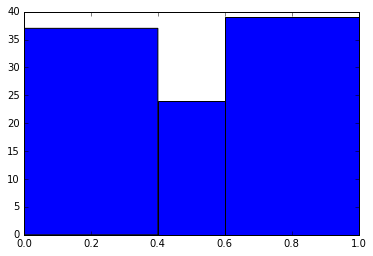

In [25]:
hist(r, [0, .4, .6, 1])
# show()

In [27]:
rn=random.randn(1000)
# numeri aleatori distribuiti normalmente, media = 0, stand dev =1

In [28]:
rn.mean()
# rn.std()

0.02635040206419911

In [115]:
rn.std()

0.98459744931348425

(array([   1.,    7.,   81.,  227.,  351.,  238.,   82.,   12.,    1.]),
 array([-4.        , -3.11111111, -2.22222222, -1.33333333, -0.44444444,
         0.44444444,  1.33333333,  2.22222222,  3.11111111,  4.        ]),
 <a list of 9 Patch objects>)

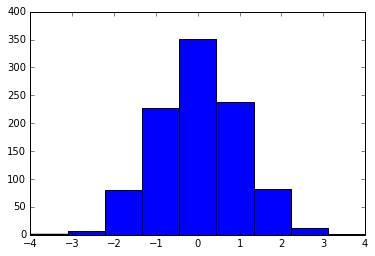

In [116]:
hist(rn,bins=linspace(-4,4,10))

be aware also of the command [histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) of numpy. For istance the previous plot could also be obtained in the following way:

In [29]:
x_bin=linspace(-4,4,10)

In [30]:
h=histogram(rn,bins=x_bin)
h # fa l'istogramma ma non lo rappresenta, uso il comando histogram
# il secondo array sono le x, il primo array l'altezza degli istogrammi

(array([  1,   7,  81, 228, 351, 237,  82,  12,   1]),
 array([-4.        , -3.11111111, -2.22222222, -1.33333333, -0.44444444,
         0.44444444,  1.33333333,  2.22222222,  3.11111111,  4.        ]))

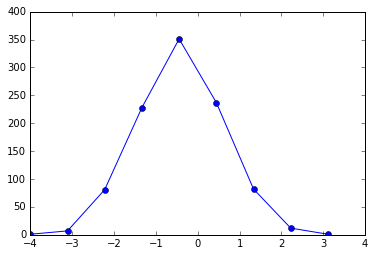

In [31]:
plot(h[1][:-1],h[0],'-o')

or using the [bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) command:

<Container object of 9 artists>

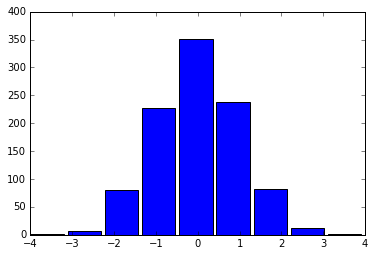

In [122]:
bar(h[1][:-1],h[0])

#### [imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow)

In [34]:
r_matrix=random.rand(100,100)

In [42]:
std(r_matrix)
r_matrix.std()
#mean(r_matrix)

0.28726453398002216

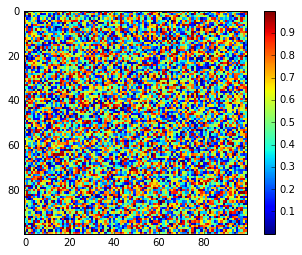

In [124]:
imshow(r_matrix,interpolation='None')
colorbar()

# Scipy

[Scipy](http://scipy.org) contains additional routines for optimization, special functions, and so on.

Some examples:
* [do you want to maximize/minimize a function?](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
* [some linear algebra (eigenvalues, matrix inversion, etc.)?](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
* [integrate a function?](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)
* [some useful statistical funciton?](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
* [further examples](https://docs.scipy.org/doc/scipy/reference/)


Consider the following example: we want to know if the sample $r1$ and the sample $r2$ come from the same distribution?

In [44]:
r1=random.randn(2453)*3

# il primo array non ha var 1, ma più alta perchè lo moltiplico per 3
# se voglio cambiare la media faccio (la media diventa 2):
#r1=random.randn(2453)*3 +2

r2=random.randn(5718)

In [138]:
# cumsum() #distribuz cumulata

In [45]:
h1=histogram(r1,linspace(-10,10,100))
h2=histogram(r2,linspace(-10,10,100))

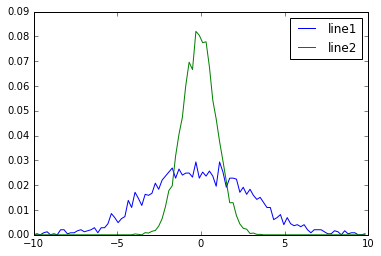

In [130]:
plot(h1[1][:-1],h1[0]*1./sum(h1[0]),label='line1')
plot(h1[1][:-1],h2[0]*1./sum(h2[0]),label='line2')
legend()

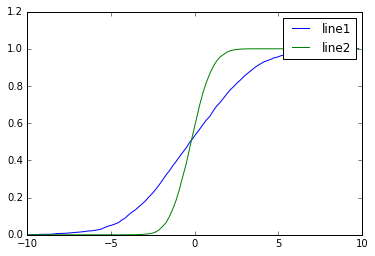

In [131]:
plot(h1[1][:-1],cumsum(h1[0]*1./sum(h1[0])),label='line1')
plot(h1[1][:-1],cumsum(h2[0]*1./sum(h2[0])),label='line2')
legend()

## [Statistical Functions](https://docs.scipy.org/doc/scipy/reference/stats.html#) in Scipy

In [46]:
from scipy import stats

#### [Two-samples Kolmogorov-Smirnov test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp)

In [133]:
r,p=stats.ks_2samp(r1,r2)

the **Kolmogorov-Smirnov** statistic

In [134]:
r
#r = 0.26 = distanza massima tra le due distribuzioni

0.25670260926402733

the **p-value**

In [135]:
p

2.9271503133268672e-99

In [136]:
 help(stats.ks_2samp)

Help on function ks_2samp in module scipy.stats.stats:

ks_2samp(data1, data2)
    Computes the Kolmogorov-Smirnov statistic on 2 samples.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    are drawn from the same continuous distribution.
    
    Parameters
    ----------
    data1, data2 : sequence of 1-D ndarrays
        two arrays of sample observations assumed to be drawn from a continuous
        distribution, sample sizes can be different
    
    Returns
    -------
    statistic : float
        KS statistic
    pvalue : float
        two-tailed p-value
    
    Notes
    -----
    This tests whether 2 samples are drawn from the same distribution. Note
    that, like in the case of the one-sample K-S test, the distribution is
    assumed to be continuous.
    
    This is the two-sided test, one-sided tests are not implemented.
    The test uses the two-sided asymptotic Kolmogorov-Smirnov distribution.
    
    If the K-S statistic is small

# Further Readings

In [137]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
